# unify sample size

In [9]:
sentences_dir = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\phrasefreqs\\'
outpath = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\'
clerk_path = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\Circuit-Courts_1995_2016__31jan2018.xls'
meta_path = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\circuit_metadata_excerpt.dta'

fws = None
import pickle 
from tqdm import tqdm
import pandas as pd
from datetime import datetime
from nltk.tokenize.regexp import RegexpTokenizer
import glob

In [32]:
def parse_sentences(sentences_dir, out_path, clerk_path, meta_path, fws, case_year=-1):
    clerk_df = pd.read_excel(clerk_path, sheet_name = 1)
    meta_df = pd.read_stata(meta_path)
    
    if case_year == -1:
        files = sentences_dir + '*/*.txt'
    else:
        files = sentences_dir + repr(case_year) + '/*.pkl.pkl'
    cols = ['year', 'judge', 'fw_count', 'clerk_school']
    tokenizer = RegexpTokenizer(r'\w+')
    data_list = []
    for filename in tqdm(glob.iglob(files, recursive=True)):
        caseid = filename.split('\\')[-1].split('_')[0]
        
        songer_names = meta_df.loc[(meta_df['caseid']==caseid) & 
                                   (meta_df['j']==meta_df['Writer']) &
                                   (meta_df['songername']!=''),'songername']
        if songer_names.count() > 0:
            if songer_names.count() > 1:
                print("more than 1 entry for case: "+ caseid)
            songer_name = songer_names.values[0]
            songer_name_split = tokenizer.tokenize(songer_name)
            songer_name_split.sort(key=len, reverse=True)
            first_last = songer_name_split[:2]
            if(len(songer_name_split)<2):
                print(songer_name_split)
                print(caseid)
            judge_clerk_df = clerk_df.loc[(clerk_df['Year']==case_year) & 
                                          (clerk_df['Clerk Law School'].notna()) &
                                          (clerk_df['Judge Name'].str.contains(first_last[0].title())) & 
                                          (clerk_df['Judge Name'].str.contains(first_last[1].title())), 
                                          ['Judge Name', 'Clerk Law School']].drop_duplicates()
            file = open(filename, 'rb')
            two_grams = pickle.load(file)
            for idx, row in judge_clerk_df.iterrows():
                entry = [case_year, row['Judge Name'], two_grams, row['Clerk Law School']]
                data_list.append(entry)
            break
    parsed_data = pd.DataFrame(data = data_list, columns = cols)
    if case_year != -1:
        parsed_data.to_csv(out_path + repr(case_year) + '_parsed.csv', index=False)
    else:
        parsed_data.to_csv(out_path + 'parsed.csv', index=False)

In [33]:
parse_sentences(sentences_dir, outpath, clerk_path, meta_path, fws, 2013)


0it [00:00, ?it/s]


In [ ]:
# sentences_dir = 'data/Circuit_Courts/circuit-cases/sentences_new/'
# fw_pkl = 'data/function_words.pkl'
# fws = pickle.load(open(fw_pkl, 'rb'))
# clerk_path = 'data/clerkships/Circuit-Courts_1995_2016__31jan2018.xls'
# meta_path = 'data/originalism/data/circuit_metadata_excerpt.dta'
# id_songer_path = 'data/originalism/caseid_songername.dta'
# outpath = 'data/'
# parse_sentences(sentences_dir, outpath, clerk_path, meta_path, fws, 2013)

In [1]:
import pickle 
two_gram_path = 'discops.pkl'
def feature_two_grams(two_gram_path):
    with open("discops.pkl", "rb") as f:
        discops = pickle.load(f)
        print("size of discops %s " % len(discops))
        count = 0
        for k, v in discops.items():
            count += 1
            year = k[0]
            judge = k[2].replace('.pkl.pkl','').lower().replace(' ', '_').replace('.', '')
            print(year, judge)
            break
feature_two_grams(two_gram_path)

size of discops 423938 
2012\X1HUOPE003 griffith


In [ ]:
import pandas as pd
def load_two_grams_pkl(two_grams_path):
    with open(two_grams_path, 'rb') as f:
        data = pickle.load(f)
        two_grams = pd.DataFrame.from_dict(data)
        return two_grams
two_grams = load_two_grams_pkl('discops.pkl')
two_grams.columns = ['name', 'two_gram_feature']
two_grams.head()

In [ ]:
def feature_two_grams(two_grams_data, out_path, clerk_path, meta_path, fws, case_year=-1):
    clerk_df = pd.read_excel(clerk_path, sheet_name = 1)
    meta_df = pd.read_stata(meta_path)

    cols = ['year', 'judge', 'fw_count', 'clerk_school']
    tokenizer = RegexpTokenizer(r'\w+')
    data_list = []
    for filename in glob.iglob(files, recursive=True):
        caseid = filename.split('/')[-1].split('_')[0]
        songer_names = meta_df.loc[(meta_df['caseid']==caseid) & 
                                   (meta_df['j']==meta_df['Writer']) &
                                   (meta_df['songername']!=''),'songername']
        if songer_names.count() > 0:
            if songer_names.count() > 1:
                print("more than 1 entry for case: "+ caseid)
            songer_name = songer_names.values[0]
            songer_name_split = tokenizer.tokenize(songer_name)
            songer_name_split.sort(key=len, reverse=True)
            first_last = songer_name_split[:2]
            if(len(songer_name_split)<2):
                print(songer_name_split)
                print(caseid)
            judge_clerk_df = clerk_df.loc[(clerk_df['Year']==case_year) & 
                                          (clerk_df['Clerk Law School'].notna()) &
                                          (clerk_df['Judge Name'].str.contains(first_last[0].title())) & 
                                          (clerk_df['Judge Name'].str.contains(first_last[1].title())), 
                                          ['Judge Name', 'Clerk Law School']].drop_duplicates()
            for idx, row in judge_clerk_df.iterrows():
                entry = [case_year, row['Judge Name'], func_word_freq(filename, fws), row['Clerk Law School']]
                data_list.append(entry)
    parsed_data = pd.DataFrame(data = data_list, columns = cols)
    if case_year != -1:
        parsed_data.to_csv(out_path + repr(case_year) + '_parsed.csv', index=False)
    else:
        parsed_data.to_csv(out_path + 'parsed.csv', index=False)

In [23]:
import csv
import pandas as pd
import os
os.chdir('C:\\Users\\jackie\\Documents')
df = pd.read_csv("stata.csv")
#df.dtypes
df = df.drop(['Unnamed: 0'], axis = 1)
df[0:100]

,caseid,Circuit,j,date,songername,Affirmed,AffirmedInPart,Reversed,ReversedInPart,Vacated,VacatedInPart,Remanded,Dissenting1,Author,Writer
0,X101L14003,4,2,2004-03-24,"DUNCAN, ALLYSON KAY",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MOTZ,1.0
1,X101L14003,4,3,2004-03-24,"KING, ROBERT BRUCE",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MOTZ,1.0
2,X101L14003,4,1,2004-03-24,"MOTZ, DIANA GRIBBON",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MOTZ,1.0
3,X10284I003,4,3,2004-03-31,"LUTTIG, J. MICHAEL",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,WILKINSON,1.0
4,X10284I003,4,1,2004-03-31,"WILKINSON, J. HARVIE, III",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,WILKINSON,1.0
5,X10284I003,4,2,2004-03-31,"TRAXLER, WILLIAM BYRD, JR.",0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,WILKINSON,1.0
6,X102UPO003,3,3,2004-04-05,"RENDELL, MARJORIE O.",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,RENDELL,3.0
7,X102UPO003,3,1,2004-04-05,"SLOVITER, DOLORES K.",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,RENDELL,3.0
8,X102UPO003,3,2,2004-04-05,"ALDISERT, RUGGERO",0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,RENDELL,3.0
9,X103660N,9,1,1994-07-25,"HUG, PROCTER R., JR.",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [53]:
import numpy as np
circuit_csv = {}
for count, series in df.iterrows():
    caseid = series[0]
    circuit = series[1]
    date = series[3]
    if isinstance(date, str):
        date = date.split('-')[0]
    else:
        continue
    judge = series[4]
    if isinstance(judge, str):
        judge = judge.split(',')[0]
    else:
        continue
    if date not in circuit_csv:
        circuit_csv[date] = []
    circuit_csv[date].append((judge.lower(), caseid, circuit))

In [63]:
print(circuit_csv['1995'][0])

('greenberg', 'X1037LGN', 3)


# doc2vec - gensim

In [11]:
from gensim import corpora
from collections import defaultdict
documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
# 去掉停用词
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# 去掉只出现一次的单词
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1
texts = [[token for token in text if frequency[token] > 1]
         for text in texts]

dictionary = corpora.Dictionary(texts)   # 生成词典

In [34]:
texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [27]:
for k, v in dictionary.iteritems():
    print(k, v)

0 computer
4 survey
2 interface
7 user
6 time
11 minors
9 trees
5 system
1 human
3 response
10 graph
8 eps


In [35]:
dictionary.doc2bow(['human', 'interface', 'computer'])

[(0, 1), (1, 1), (2, 1)]

In [15]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [16]:
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


In [11]:
import pickle
with open("X1AL63ON_contentMajOp_NIES_pos.pkl.pkl", "rb") as f:
    data = pickle.load(f)
    print(len(data))
    print(data)

59
[[518], [4861, 1025, 77827, 7, 944, 25416], [630, 9489, 944, 6120], [181], [191, 17025, 33271], [191, 20220], [4, 5841, 33271, 34731, 478], [7314, 33271, 7661, 1], [4], [4861, 1], [62998, 6420], [84356, 1, 82, 35792], [73168, 31], [5894, 25119, 75100, 2037], [82], [31, 746, 1746, 4788, 13309], [6280, 1, 82, 92176, 3735], [20757, 10450, 5034, 8402, 5034], [966, 1756, 790, 82], [33271, 17025], [10625, 33271, 57471, 33271, 32336], [5894, 17025, 37450, 37073, 19959, 37073, 33271], [93888, 33271], [19959, 5257], [52, 4510, 18917, 891, 33271], [1, 12844], [1], [1], [55970], [2485, 5605, 33271], [1834, 62330], [10625, 33271], [21976, 31], [30814, 6280], [43189, 838, 12118, 31], [4688], [795], [7647, 20220, 31], [95083], [90986], [17025, 37450], [52899], [20220, 33271, 17025], [5894, 1], [21713], [10344], [50288, 1321], [73802], [1098, 13593, 2405, 2347], [1486], [23152], [4, 10000], [2220], [4861], [213, 24722, 928, 37741], [1345, 3754], [28, 2893, 64851], [16050], [1884, 62330, 2886, 3532

In [12]:
with open("id2gram_pos.pkl", "rb") as f:
    ref = pickle.load(f)
    print(len(ref))
    
    for i in range(len(data)):
        origin = []
        for j in range(len(data[i])):
            origin.append(ref[data[i][j]])
        print(origin)

96977
['senior_circuit']
['trade_council', 'defendant_appeal', 'judgment_united', 'state_court', 'international_trade', 'enter_july']
['court_action', 'final_result', 'international_trade', 'antidumping_duty']
['fed_reg']
['inter_alia', 'foreign_market', 'third_country']
['inter_alia', 'average_price']
['trial_court', 'governing_statute', 'third_country', 'price_may', 'factual_basis']
['court_credit', 'third_country', 'price_would', 'united_state']
['trial_court']
['trade_council', 'united_state']
['appeal_judgment', 'party_appeal']
['cabot_corp', 'united_state', 'fed_cir', 'remand_decision']
['determination_review', 'substantial_evidence']
['tariff_act', 'rhone_poulenc', 'inc_united', 'state_fed']
['fed_cir']
['substantial_evidence', 'relevant_evidence', 'reasonable_mind', 'might_accept', 'adequate_support']
['matsushita_elec', 'united_state', 'fed_cir', 'citing_universal', 'camera_corp']
['traditional_principle', 'judicial_deference', 'agency_interpretation', 'review_question', 'agen

In [13]:
# X1AL63ON_contentMajOp_NIES_no_pos.pkl.pkl
import pickle
with open("X1AL63ON_contentMajOp_NIES_npos.pkl.pkl", "rb") as f:
    data = pickle.load(f)
    print(len(data))
    print(data)

62
[[593], [5967, 1178, 105360, 8, 1101, 32564], [726, 11849, 1101, 7444], [203], [138, 21588, 43024], [138, 25761], [4, 72138, 6943, 43024, 44943, 17333], [9069, 83084, 43024, 9492, 1], [4, 54728], [5967, 1], [82380, 7932], [115174, 1, 92, 46322], [98542, 10788, 35], [7272, 32192, 101375, 2432], [92], [35, 859, 2043, 5885, 16699], [7742, 1, 92, 126962, 4540], [26465, 13101, 6191, 10423, 75652], [1128, 2074, 917, 92], [43024, 21588], [13318, 43024, 76275, 43024, 41800], [7272, 21588, 48547, 48040, 25420, 48040, 43024], [129582, 43024, 4844], [7695, 25420, 5947], [57, 5532, 127609, 1038, 71692, 43024], [1, 16126], [1], [1], [74142], [2992, 6881, 71692, 43024], [2162, 83044], [33494, 61037, 4844, 43024], [13637, 26656], [16110, 35], [1079, 118504, 39153, 7742], [56368, 971, 14500, 35], [666, 5746], [922], [9282, 25761, 35], [21441, 131365], [125140], [21588, 48547, 24810, 26366], [69826], [25761, 8364, 43024, 21588], [7272, 1], [50810], [27715], [12955], [65967, 1553], [99438], [1290, 17

In [14]:
with open("id2gram_npos.pkl", "rb") as f:
    ref = pickle.load(f)
    print(len(ref))
    
    for i in range(len(data)):
        origin = []
        for j in range(len(data[i])):
            origin.append(ref[data[i][j]])
        print(origin)

134211
['senior_circuit']
['trade_council', 'defendant_appeal', 'judgment_united', 'state_court', 'international_trade', 'enter_july']
['court_action', 'final_result', 'international_trade', 'antidumping_duty']
['fed_reg']
['inter_alia', 'foreign_market', 'third_country']
['inter_alia', 'average_price']
['trial_court', 'finding_reasonable', 'governing_statute', 'third_country', 'price_may', 'adequate_factual']
['court_credit', 'factor_underlying', 'third_country', 'price_would', 'united_state']
['trial_court', 'also_persuade']
['trade_council', 'united_state']
['appeal_judgment', 'party_appeal']
['cabot_corp', 'united_state', 'fed_cir', 'remand_decision']
['determination_review', 'upheld_unless', 'substantial_evidence']
['tariff_act', 'rhone_poulenc', 'inc_united', 'state_fed']
['fed_cir']
['substantial_evidence', 'relevant_evidence', 'reasonable_mind', 'might_accept', 'adequate_support']
['matsushita_elec', 'united_state', 'fed_cir', 'citing_universal', 'camera_corp']
['traditional_pr

In [21]:
from nltk.tag import perceptron
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
text = "The trial court upheld ITA's use of constructed value, finding reasonable ITA's interpretation of its governing statute that third country prices may be abandoned if there is an adequate factual basis in the record for doing so."
text = ['trial_court', 'finding_reasonable', 'governing_statute', 'third_country', 'price_may', 'adequate_factual']
for i in range(len(text)):
    tokens = word_tokenize(text[i])
    tagged_sentence = tagger.tag(tokens)
    print(tagged_sentence)

[('trial_court', 'NN')]
[('finding_reasonable', 'JJ')]
[('governing_statute', 'NN')]
[('third_country', 'NN')]
[('price_may', 'NN')]
[('adequate_factual', 'JJ')]


In [23]:
from nltk.tag import perceptron
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
text = "The trial court upheld ITA's use of constructed value, finding reasonable ITA's interpretation of its governing statute that third country prices may be abandoned if there is an adequate factual basis in the record for doing so."
text = ['trial_court', 'governing_statute', 'third_country', 'price_may', 'factual_basis']
for i in range(len(text)):
    tokens = word_tokenize(text[i])
    tagged_sentence = tagger.tag(tokens)
    print(tagged_sentence)

[('trial_court', 'NN')]
[('governing_statute', 'NN')]
[('third_country', 'NN')]
[('price_may', 'NN')]
[('factual_basis', 'NN')]


In [12]:
with open("X1AL63ON_contentMajOp_NIES_freq.pkl.pkl", "rb") as f:
    freq = pickle.load(f)
    print(freq)
    print(freq[1])

Counter({33271: 12, 1: 8, 31: 6, 17025: 5, 82: 4, 4: 3, 5894: 3, 4861: 3, 20220: 3, 37450: 2, 62330: 2, 10625: 2, 6280: 2, 944: 2, 191: 2, 19959: 2, 37073: 2, 5034: 2, 1025: 1, 77827: 1, 518: 1, 7: 1, 92176: 1, 9489: 1, 6420: 1, 20757: 1, 790: 1, 13593: 1, 795: 1, 28: 1, 7314: 1, 1321: 1, 1834: 1, 2347: 1, 12844: 1, 52: 1, 5841: 1, 43189: 1, 1345: 1, 838: 1, 25416: 1, 2893: 1, 32336: 1, 64851: 1, 12118: 1, 1884: 1, 30814: 1, 181: 1, 10000: 1, 2405: 1, 10344: 1, 90986: 1, 95083: 1, 37741: 1, 50288: 1, 630: 1, 891: 1, 57471: 1, 84356: 1, 62998: 1, 5257: 1, 5605: 1, 7661: 1, 24722: 1, 3735: 1, 4510: 1, 928: 1, 23152: 1, 55970: 1, 52899: 1, 2886: 1, 8402: 1, 3754: 1, 34731: 1, 2220: 1, 16050: 1, 4788: 1, 2485: 1, 25119: 1, 1098: 1, 93888: 1, 966: 1, 3532: 1, 73802: 1, 1486: 1, 35792: 1, 1746: 1, 213: 1, 21976: 1, 1756: 1, 4688: 1, 478: 1, 7647: 1, 73168: 1, 18917: 1, 21713: 1, 6120: 1, 746: 1, 10450: 1, 13309: 1, 2037: 1, 75100: 1})
8


In [24]:
with open("condisops.pkl", "rb") as f:
    condisops = pickle.load(f)
    print(len(condisops))
    for k, v in condisops.items():
        print(k, v)
        break

4634
('2000\\X3FNLN', 'contentConDisOp1', 'LOKEN.pkl.pkl') Counter({0: 7, 7102: 7, 61279: 5, 101: 5, 1332: 4, 19865: 4, 21402: 4, 5444: 3, 8026: 3, 94301: 3, 352: 3, 9581: 3, 28377: 3, 1: 2, 6920: 2, 17: 2, 601: 2, 23652: 2, 38124: 2, 1930: 2, 2463: 2, 1197: 2, 8715: 2, 91987: 2, 9213: 2, 516: 1, 26117: 1, 14599: 1, 9: 1, 4619: 1, 2317: 1, 19: 1, 23829: 1, 2150: 1, 1051: 1, 4896: 1, 11045: 1, 20263: 1, 22062: 1, 60116: 1, 24888: 1, 16445: 1, 63: 1, 34880: 1, 76099: 1, 5702: 1, 23111: 1, 72: 1, 74: 1, 89167: 1, 4945: 1, 3666: 1, 3411: 1, 15444: 1, 21845: 1, 79702: 1, 92: 1, 2145: 1, 3170: 1, 16995: 1, 67685: 1, 1638: 1, 2833: 1, 19310: 1, 13938: 1, 275: 1, 26232: 1, 15225: 1, 1914: 1, 82050: 1, 25995: 1, 25999: 1, 4496: 1, 15982: 1, 63644: 1, 1950: 1, 58784: 1, 3234: 1, 31909: 1, 2727: 1, 2732: 1, 35503: 1, 182: 1, 11447: 1, 5956: 1, 2981: 1, 5306: 1, 19851: 1, 26565: 1, 46535: 1, 47308: 1, 61652: 1, 2261: 1, 71545: 1, 12762: 1, 2938: 1, 9182: 1, 57055: 1, 85987: 1, 66277: 1, 43499: 1, 

In [25]:
with open("conops.pkl", "rb") as f:
    conops = pickle.load(f)
    print(len(conops))
    for k, v in conops.items():
        print(k, v)
        break

13986
('1976\\X3O59B', 'contentConOp1', 'WINTER.pkl.pkl') Counter({403: 4, 0: 1, 3714: 1, 4643: 1, 5544: 1, 38830: 1, 3698: 1, 3411: 1, 11477: 1, 17945: 1, 39763: 1, 9564: 1, 94142: 1})


In [2]:
import pickle
with open("discops.pkl", "rb") as f:
    discops = pickle.load(f)
    print(len(discops))

423938


In [3]:
newdict = {}
with open("discops.pkl", "rb") as f:
    discops = pickle.load(f)
    print("size of discops %s " % len(discops))
    count = 0
    for k, v in discops.items():
        count += 1
        year = k[0][0:4]
        judge = k[2].replace('.pkl.pkl','').lower().replace(' ', '_').replace('.', '')
        names = judge.split('_')
        new_names = []
        for x in names:
            if len(x) > 2:
                new_names.append(x)
        new_names.sort()
        judge = '_'.join([x for x in new_names])
        # counter and school
        newdict[(year, judge)] = v
print(len(newdict))

size of discops 423938 
26920


In [28]:
#XFIJT7_contentMajOp_PRITCHARD.pkl.pkl
with open("XFIJT7_contentMajOp_PRITCHARD.pkl.pkl", "rb") as f:
    freq = pickle.load(f)
    print(len(freq))
    print(freq)

92
Counter({329: 7, 5499: 7, 2445: 6, 2666: 5, 57750: 3, 2: 2, 323: 2, 71: 2, 1640: 2, 108: 2, 73545: 2, 22529: 2, 7676: 2, 0: 1, 1: 1, 7171: 1, 214: 1, 72705: 1, 265: 1, 23562: 1, 13: 1, 51726: 1, 7185: 1, 30237: 1, 43141: 1, 6691: 1, 14116: 1, 38438: 1, 16427: 1, 45: 1, 1067: 1, 37172: 1, 17974: 1, 80440: 1, 313: 1, 321: 1, 77378: 1, 71095: 1, 9741: 1, 23120: 1, 3932: 1, 1129: 1, 73067: 1, 24685: 1, 8046: 1, 31602: 1, 72819: 1, 34166: 1, 6783: 1, 8577: 1, 8068: 1, 16005: 1, 27793: 1, 33938: 1, 50067: 1, 14742: 1, 156: 1, 22174: 1, 7071: 1, 27040: 1, 1956: 1, 167: 1, 51113: 1, 54442: 1, 684: 1, 2479: 1, 434: 1, 94849: 1, 7353: 1, 45855: 1, 2748: 1, 58557: 1, 27842: 1, 57028: 1, 72649: 1, 10186: 1, 40401: 1, 14293: 1, 8662: 1, 26583: 1, 3664: 1, 219: 1, 3039: 1, 22241: 1, 36322: 1, 27533: 1, 8681: 1, 58349: 1, 27633: 1, 34290: 1, 2463: 1, 30933: 1})


In [54]:
import csv
mp_csv = {}
with open("school.csv", 'r', encoding = 'utf8') as csvfile:
    lawschool = csv.reader(csvfile, delimiter = ',')
    for rows in lawschool:
        try:
            if len(rows) != 3 or \
            len(rows[0]) == 0 or \
            len(rows[1]) == 0 or \
            len(rows[2]) == 0:
                continue
            year = rows[0]
            if len(year) != 4 or (year[0] < '0' and year[0] > '9'):
                continue
            judge = rows[1].lower()
            names = judge.split('_')
            new_names = []
            for x in names:
                if len(x) > 2:
                    new_names.append(x)
            new_names.sort()
            judge = '_'.join([x for x in new_names])
            school = rows[2]
            if school == '9999':
                continue
            #print(year + "," + judge + "," + school) 
            if (year, judge) not in mp_csv:
                mp_csv[(year, judge)] = []
            mp_csv[(year, judge)].append(school)
        except TypeError:
            print("type error")
for k, v in mp_csv.items():
    print(k, v)


('2000', 'davis_eugene') ['Chicago', 'Chicago']
('2002', 'evans_terence') ['Michigan', 'Chicago']
('2003', 'james_loken') ['Minnesota', 'Harvard', 'Chicago']
('2003', 'dalzell_stewart') ['Yale', 'Iowa']
('1995', 'anderson_stephen') ['Berkeley', 'Utah']
('1996', 'demoss_harold') ['St. Louis ']
('1995', 'alito_samuel') ['Georgetown University Law Center', 'Seton Hall University', 'Harvard Law School']
('1996', 'leval_pierre') ['Brooklyn', 'NYU', 'Columbia']
('2004', 'arthur_garjarsa') ['Berkeley', 'Harvard']
('1998', 'tashima_wallace') ['Yale', 'Harvard', 'UCLA', 'Yale']
('1996', 'davies_john') ['USC']
('1998', 'emory_widener') ['George_Washington', 'Washington_&_Lee', 'Arkansas']
('2000', 'fuentes_julio') ['Berkeley', 'NYU', 'NYU']
('1996', 'anderson_stephen') ['Utah', 'Duke University']
('2003', 'crane_randall_robert') ['Texas', 'Texas']
('2000', 'deanell_reece_tacha') ['Duke', 'Kansas', 'Washington_U']
('1998', 'barkett_rosemary') ['1991', 'University of Michigan', 'Yale Law School', 

In [44]:
x = (1,2)


In [45]:
x[0]

1

In [50]:
x = ['abc', 'ef', 'b']

In [51]:
x

['abc', 'ef', 'b']

In [52]:
x.sort()

In [53]:
x

['abc', 'b', 'ef']

In [55]:
from sklearn import datasets


# Functional Words training

In [24]:
import pandas as pd 
df = pd.read_csv("1996_normed.csv")

In [25]:
df.head()
df = df[df.clerk_school != '9999']
y = df['clerk_school']
X = df.drop(['judge', 'clerk_school'], axis=1)

In [80]:
X.loc[12471]

year        1995.000000
a              0.157895
aboard         0.000000
about          0.100000
absent         0.000000
across         0.000000
after          0.043478
against        0.095238
ahead          0.000000
albeit         0.000000
all            0.040000
along          0.000000
although       0.000000
amid           0.000000
amidst         0.000000
among          0.100000
amongst        0.000000
amount         0.161290
an             0.129630
and            0.113636
anti           0.000000
around         0.000000
as             0.165680
at             0.070175
away           0.076923
bar            0.000000
barring        0.000000
be             0.104938
behind         0.000000
below          0.000000
               ...     
unto           0.000000
up             0.000000
upon           0.037736
us             0.041237
various        0.000000
versus         0.000000
via            0.000000
view           0.000000
we             0.135714
what           0.136364
when           0

In [38]:
import re

def labelCleanUp(label):
    label = label.lower()
    label = label.replace('nyu', 'new york')
    label = label.replace('smu', 'southern methodist')
    label = label.replace('case western reserve', 'case western')
    pattern1 = 'law|school|college|uc|university|(university of )|(_u)|( u$)|of'
    pattern2 = '[-_]'
    label = re.sub(pattern1, '', label)
    label = re.sub(pattern2, ' ', label)
    label = label.lstrip().rstrip()
    return label

#y = y.map(labelCleanUp)

'davis'

In [27]:
y.describe()

count       10471
unique        101
top       Harvard
freq         1354
Name: clerk_school, dtype: object

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train))
print(len(X_test))

7853
2618


In [29]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e8)

In [30]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
logreg.score(X_train, y_train)

0.23163122373615178

In [49]:
x = logreg.classes_
print(x)

['American_U' 'Arizona' 'Arkansas' 'BYU' 'Berkeley' 'Boalt_Hall'
 'Boston_Col' 'Boston_U' 'Brooklyn_Law' 'Case_Western' 'Catholic_U'
 'Chicago' 'Columbia' 'Cornell' 'Creighton' 'DePaul' 'Denver' 'Detroit'
 'Detroit_Col' 'Drake' 'Duke' 'Emory' 'Florida' 'Franklin_Pierce'
 'George_Mason' 'George_Washington' 'Georgetown' 'Harvard' 'Hastings'
 'Houston' 'Howard_U' 'Idaho' 'Illinois' 'Indiana' 'Indiana_U' 'Iowa'
 'Kansas' 'Kentucky' 'LSU' 'Lewis_&_Clark' 'Loyola' 'LoyolaCA' 'Maine'
 'Memphis_State' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'NYU'
 'Nebraska' 'New_Mexico' 'New_York_Law_School' 'North_Carolina'
 'Northwestern' 'Notre_Dame' 'Ohio_Northern' 'Ohio_State' 'Oklahoma'
 'Oregon' 'Penn' 'Pennsylvania' 'Pepperdine' 'Pittsburgh' 'Rutgers' 'SMU'
 'Salmon_P_Chase' 'SanDiego' 'Seattle' 'SetonHall' 'Seton_Hall'
 'SouthCarolina' 'SouthDakota' 'South_Carolina' 'South_Dakota'
 'SouthernIllinois' 'Southern_Illinois' 'Southern_Methodist' 'Stanford'
 'Syracuse' 'Tennessee' 'Texas' 'TexasTec

In [74]:
y = logreg.predict_proba(X_test)
#print(y[0])
len(y[0])

import numpy
from matplotlib import pyplot as plt
'''
y_pos = numpy.arange(len(y[0]))
plt.bar(y_pos, y[0], align='center', alpha=0.5)
plt.xticks(y_pos, x, fontsize = 7)
plt.ylabel('Probability')
plt.title('Histogram of law school')
plt.show()
'''

zipped = zip(x, y[0])
print(zipped)
sorted(zipped, key=lambda x: x[1], reverse = True)
#yy = logreg.predict(X_test)
#print(yy)
X_test.head()

,year,a,aboard,about,absent,across,after,against,ahead,albeit,...,whose,will,with,within,without,would,yet,you,your,yourself
12471,1995,0.157895,0.0,0.100,0.0,0.0,0.043478,0.095238,0.0,0.0,...,0.0,0.038462,0.104,0.066667,0.24,0.142857,0.000000,0.0,0.222222,0.0
6594,1995,0.078040,0.0,0.000,0.0,0.0,0.065217,0.111111,0.0,0.5,...,0.0,0.000000,0.152,0.033333,0.04,0.079365,0.090909,0.0,0.000000,0.0
1073,1995,0.036298,0.0,0.025,0.0,0.0,0.021739,0.015873,0.0,0.0,...,0.0,0.000000,0.032,0.000000,0.08,0.015873,0.000000,0.0,0.000000,0.0
2132,1995,0.110708,0.0,0.225,0.0,0.0,0.260870,0.000000,0.0,0.0,...,0.0,0.019231,0.144,0.000000,0.04,0.015873,0.000000,0.0,0.000000,0.0
4969,1995,0.194192,0.0,0.125,0.0,0.2,0.108696,0.253968,0.0,0.0,...,0.0,0.192308,0.192,0.166667,0.16,0.158730,0.000000,0.0,0.000000,0.0


In [69]:
logreg.score(X_test, y_test)

0.1443850267379679

In [51]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
clf.score(X_train, y_train)

0.12823124920412582

# Gensim

In [4]:
sentences_dir = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\sentences_new\\'
outpath = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\'
clerk_path = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\Circuit-Courts_1995_2016__31jan2018.xls'
meta_path = 'C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\data\\circuit_metadata_excerpt.dta'

fws = None
import pickle 
from tqdm import tqdm
import pandas as pd
from datetime import datetime
from nltk.tokenize.regexp import RegexpTokenizer
import glob
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk import tokenize

In [27]:
def parse_sentences(sentences_dir, out_path, clerk_path, meta_path, fws, case_year=-1):
    clerk_df = pd.read_excel(clerk_path, sheet_name = 1)
    meta_df = pd.read_stata(meta_path)
    
    if case_year == -1:
        files = sentences_dir + '*/*.txt'
    else:
        files = sentences_dir + 'sent_' + repr(case_year) + '/*.txt'
    cols = ['year', 'judge', 'fw_count', 'clerk_school']
    tokenizer = RegexpTokenizer(r'\w+')
    data_list = []
    for filename in tqdm(glob.iglob(files, recursive=True)):
        caseid = filename.split('\\')[-1].split('_')[0]
        
        songer_names = meta_df.loc[(meta_df['caseid']==caseid) & 
                                   (meta_df['j']==meta_df['Writer']) &
                                   (meta_df['songername']!=''),'songername']
        if songer_names.count() > 0:
            if songer_names.count() > 1:
                print("more than 1 entry for case: "+ caseid)
            songer_name = songer_names.values[0]
            songer_name_split = tokenizer.tokenize(songer_name)
            songer_name_split.sort(key=len, reverse=True)
            first_last = songer_name_split[:2]
            if(len(songer_name_split)<2):
                print(songer_name_split)
                print(caseid)
            judge_clerk_df = clerk_df.loc[(clerk_df['Year']==case_year) & 
                                          (clerk_df['Clerk Law School'].notna()) &
                                          (clerk_df['Judge Name'].str.contains(first_last[0].title())) & 
                                          (clerk_df['Judge Name'].str.contains(first_last[1].title())), 
                                          ['Judge Name', 'Clerk Law School']].drop_duplicates()
            #file = open(filename, 'r')
            #two_grams = pickle.load(file)
            #txt = file.read()
            #print(txt)
            #tokens = tokenizer.tokenize(txt)
            import codecs
            f = codecs.open(filename, 'r', 'utf-8-sig')
            txt = f.read()
            tokens = tokenizer.tokenize(txt)
            feature = model.infer_vector(tokens)
            for idx, row in judge_clerk_df.iterrows():
                entry = [case_year, row['Judge Name'], feature, row['Clerk Law School']]
                data_list.append(entry)
    parsed_data = pd.DataFrame(data = data_list, columns = cols)
    if case_year != -1:
        parsed_data.to_csv(out_path + repr(case_year) + '_parsed_doc2vec.csv', index=False)
    else:
        parsed_data.to_csv(out_path + 'parsed_doc2vec.csv', index=False)

In [28]:
parse_sentences(sentences_dir, outpath, clerk_path, meta_path, fws, 1995)

7194it [29:37,  4.05it/s]


In [2]:
import glob
import os
import random

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk import tokenize
from zipfile import ZipFile

from tqdm import tqdm

os.chdir('C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\circuit_courts\\sentences\\')
zfile = ZipFile('sent_1995.zip')
#zfile = ZipFile('sentences_95_04.zip')
#zfile = ZipFile('sentences_95_97.zip')

items = zfile.namelist()
# Use a tokenizer that retains punctuation
tokenizer = tokenize.WordPunctTokenizer()

def document_iterator():
    '''Iterate through all of the documents we care about.'''
    
    # Local path of all of our document files    
    #random.shuffle(items)
    for count, item in enumerate(items):
        #print(count, item)
        if 'contentMajOp' not in item:
            continue
        _year,fname = item.split('/')
        if count == 0:
            print(fname)
        #print(fname)
        _, year = _year.split('_')
        if count == 0:
            print(year)
        #if int(year) < 1970 or int(year) > 2000:
        #    continue
        if not count % 50000:
            print('%d files processed' % count)
       
        txt = zfile.open(item).read().decode()
        tokens = tokenizer.tokenize(txt)
        if len(tokens) > 30:
            yield TaggedDocument(tokens, [fname])

model = Doc2Vec(min_count=50, window=50, size=10, sample=1e-4, negative=5, workers=4, max_vocab_size=10e7, dm=0)
model.build_vocab(document_iterator())



for _ in range(10):
    model.train(document_iterator(), total_examples=model.corpus_count, epochs=model.iter)
    #model.save('judges_corpus_FINAL_v3.d2v')
    
model.delete_temporary_training_data()

C:\Program Files\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


In [3]:
model.corpus_count
#model.wv['law']

6291

In [25]:
model.wv.n_similarity("adequate factual basis".split(), "proper fact".split())

0.08628532355689622

In [113]:
import csv
mp_csv = {}
os.chdir("C:\\Users\\jackie\\Documents")
with open("chao_0811.csv", 'r') as csvfile:
    lawschool = csv.reader(csvfile, delimiter = ',')
    for rows in lawschool:
        try:
            year = rows[0]
            judge = rows[1].lower()
            school = rows[2]
            #print(year + "," + judge + "," + school)
            if year not in mp_csv:
                mp_csv[year] = []
            mp_csv[year].append((judge, school))
        except TypeError:
            print("type error")
print(len(mp_csv))


10


In [32]:
import csv
import os
import pandas as pd
mp_csv = {}
os.chdir("C:\\Users\\jackie\\Documents")
with open("chao_0811.csv", 'r') as csvfile:
    lawschool = csv.reader(csvfile, delimiter = ',')
    for rows in lawschool:
        try:
            year = rows[0]
            judge = rows[1].lower().split('_')[0]
            school = rows[2]
            #print(year + "," + judge + "," + school)
            if year != '1995':
                continue
            if (year,judge) not in mp_csv:
                mp_csv[(year,judge)] = []
            mp_csv[(year,judge)].append(school)
        except TypeError:
            print("type error")

new_mp_csv = {}
for k, v in mp_csv.items():
    temp = tuple(v)
    new_mp_csv[temp] = k

count_mp = {}
for k, v in new_mp_csv.items():
    if k not in count_mp:
        count_mp[k] = 0
    count_mp[k] += 1

count = 0
for k, v in count_mp.items():
    count += 1
    print(k, v)
print(count)

#data = pd.DataFrame.from_dict(mp_csv, orient = 'index')
#data

('Santa_Clara',) 1
('Washington_U', 'Boalt_Hall') 1
('Harvard', 'Harvard') 1
('Chicago', 'Harvard', 'Arizona') 1
('Tulane', 'Florida_State') 1
('Vermont', 'Stanford') 1
('Pittsburgh', 'Pittsburgh') 1
('Utah', 'Brigham_Young') 1
('Michigan', 'Harvard') 1
('Detroit_Mercy', 'Wayne_State') 1
('Pittsburgh', 'Duquesne') 1
('St_Louis_U', 'William_&_Mary') 1
('Pittsburgh', 'Michigan') 1
('Northeastern', 'Southern_Methodist') 1
('George_Washington', 'Georgetown') 1
('Toledo', 'Virginia') 1
('Mississippi_Col',) 1
('Emory', 'Emory', 'Tennessee', 'Tennessee') 1
('Georgetown', 'NYU') 1
('Georgetown', 'Virginia', 'Yale') 1
('Hastings', 'George_Washington', 'San_Francisco') 1
('Vanderbilt',) 1
('Virginia', 'Virginia') 1
('Virginia', 'Duke', 'Yale') 1
('Chicago-Kent', 'Illinois') 1
('Michigan', 'Chicago', 'George_Mason') 1
('Cornell', 'Cornell') 1
('Texas', 'Texas', 'Kentucky') 1
('New_Mexico', 'Iowa', 'Iowa', 'Drake') 1
('Oklahoma', 'William_&_Mary', 'New_York_Law_School', 'Florida_State', 'Temple', 

In [11]:
features = []
labels = []
feature_circuit = []
for count, item in enumerate(items):
    #print(count, item)
    if 'contentMajOp' not in item:
        continue
    _year,fname = item.split('/')
    _, year = _year.split('_')
    
    fname = fname.replace('.txt', '').split('_')
    subname = fname[-1].lower()
    casename = fname[0]
    if year in mp_csv:
        judge_school = mp_csv[year]
        judge_circuit = circuit_csv[year]
        for i in range(len(judge_school)):
            judge_name = judge_school[i][0].split('_')
            if subname == judge_name[0]:
                labels.append(judge_school[i][1])
                txt = zfile.open(item).read().decode()
                tokens = tokenizer.tokenize(txt)
                features.append(model.infer_vector(tokens)) 
                count = 0
                index = -1
                for j in range(len(judge_circuit)):
                    if subname == judge_circuit[j][0] and casename == judge_circuit[j][1]:
                        count += 1
                        index = j
                if count == 1:
                    feature_circuit.append(judge_circuit[index][2])
                else:
                    features = features[:-1]
                    labels = labels[:-1]    

In [71]:
features = []
labels = []
feature_circuit = []
for count, item in enumerate(items):
    #print(count, item)
    if 'contentMajOp' not in item:
        continue
    _year,fname = item.split('/')
    _, year = _year.split('_')
    
    fname = fname.replace('.txt', '').split('_')
    subname = fname[-1].lower()
    casename = fname[0]
    if (year,subname) in mp_csv:
        #print(year)
        labels.append(mp_csv[(year, subname)])
        txt = zfile.open(item).read().decode()
        tokens = tokenizer.tokenize(txt)
        features.append(model.infer_vector(tokens)) 
        '''
        count = 0
        index = -1
        for j in range(len(judge_circuit)):
            if subname == judge_circuit[j][0] and casename == judge_circuit[j][1]:
                count += 1
                index = j
        if count == 1:
            feature_circuit.append(judge_circuit[index][2])
        else:
            features = features[:-1]
            labels = labels[:-1]    
        '''

In [155]:
len(features) == len(labels)

True

In [101]:
len(feature_circuit)

9314

In [78]:
feature_circuit[0]

3

In [64]:
len(features)

9842

In [72]:
for i in range(len(labels)):
    labels[i] = list(set(labels[i]))

In [73]:
total_school = []
for i in range(len(labels)):
    for j in range(len(labels[i])):
        total_school.append(labels[i][j])
total_school = list(set(total_school))

In [141]:
print(total_school)

['Upenn', 'Wisconsin', 'WayneState', 'Rutgers', 'Detroit_Law', 'Capital', 'Emory', 'Georgia_State', 'Seattle', 'SetonHall', 'SMU', 'BYU', 'Memphis_State', 'Texas', 'Vanderbilt', 'Berkeley', 'Drake', 'Cleveland_State', 'Houston', 'LSU', 'Minnesota', 'Lewis_&_Clark', 'Vermont', 'Seton_Hall', "St_Mary's_U", 'Maryland', 'Kentucky', 'Pennsylvania', 'Indiana', 'Tulsa', 'DePaul', 'Georgetown', 'Franklin_Pierce', 'Boston_Col', 'Penn', 'Loyola', 'Case_Western', 'UNC', 'Salmon_P_Chase', 'Wayne_State', 'Ohio_Northern', 'UCLA', 'Nebraska', 'SouthernIllinois', 'Harvard', 'Detroit_Col', 'Oregon', 'Notre_Dame', 'Akron', 'American_U', 'Brooklyn_Law', 'New_Mexico', 'Yale', 'New_York_Law_School', 'Washington_U', 'Missouri', 'South_Dakota', 'SanDiego', 'Suffolk', 'Northwestern', 'North_Carolina', 'Denver', 'Catholic_U', 'Tennessee', 'Georgia', 'Baylor', 'Hastings', 'William_&_Mary', 'George_Mason', 'UC_Davis', 'South_Carolina', 'George_Washington', 'Iowa', 'Fordham', 'Texas_Tech', 'LoyolaLouisana', 'Will

In [74]:
import numpy as np
bits_label = np.empty((len(features), len(total_school)))
print(bits_label.shape[1])

184


In [75]:
for i in range(len(features)):
    for j in range(len(labels[i])):
        idx = total_school.index(labels[i][j])
        #print(labels[i][j], idx)
        bits_label[i][idx] = 1

In [76]:
print(bits_label.shape)
a = np.unique(bits_label,axis=0)
print(a.shape)

(9842, 184)
(455, 184)


In [20]:
import pandas as pd
df = pd.DataFrame.from_records(features)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.360765,-0.245358,-0.280518,0.188777,0.251807,0.436228,0.198693,-0.037318,-0.021511,-0.078012,...,0.251576,-0.140251,0.115390,-0.198935,-0.227729,0.227059,-0.014546,0.063213,-0.094528,0.212205
1,0.370651,-0.185899,0.241588,0.198740,0.311492,-0.451923,0.167891,0.119086,0.019686,-0.253645,...,-0.206868,0.330547,-0.121117,-0.481044,-0.136067,-0.013529,-0.462106,-0.008594,0.490850,0.132362
2,0.032917,0.127105,0.302895,-0.063106,0.028587,0.192772,-0.001982,0.293403,0.111588,0.067861,...,0.186143,0.080879,-0.338454,0.517012,-0.003664,-0.137048,0.631531,-0.458235,0.287550,0.701346
3,0.035522,-0.074096,0.047344,0.203311,0.501766,-0.523494,0.399656,-0.422623,-0.378232,-0.304766,...,0.238264,0.764874,-0.014711,-0.346877,0.013127,-0.545151,-0.409304,0.300287,-0.358519,0.046076
4,0.274245,0.514624,0.140815,-0.139408,-0.205899,-0.030438,0.076261,0.126936,-0.073951,-0.212936,...,0.075396,-0.034813,0.274410,0.972019,-0.192017,0.059000,-0.349595,-0.164840,0.026582,0.108249


In [21]:
df_label = pd.DataFrame.from_records(bits_label, columns = total_school)
df_label.head()

,Detroit_Law,Notre_Dame,Cincinnati,Seton_Hall,Hofstra,LoyolaCA,Maryland,Ohio_Northern,IU-Purdue_U_Indianapolis,WilliamMary,...,Northwestern,Drake,Arizona,South_Dakota,George_Mason,Yale,Chicago,Rutgers,Washington_U,Boalt_Hall
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
print(df_label.columns)

Index(['Upenn', 'Wisconsin', 'WayneState', 'Rutgers', 'Detroit_Law', 'Capital',
       'Emory', 'Georgia_State', 'Seattle', 'SetonHall',
       ...
       'Columbia', 'Kansas', 'Ohio_State', 'Boalt_Hall', 'Hofstra', 'Detroit',
       'Creighton', 'USC', 'Oklahoma', 'SouthCarolina'],
      dtype='object', length=124)


In [83]:
df_all = pd.concat([df, df_label], axis=1)
df_all.head()
df_all.to_pickle("multi_label_sample_10000_feature_800.pickle")

In [77]:
features_array = np.array(features)
features_array.shape

(9842, 800)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_array, bits_label, test_size=0.25)
print(len(X_train))
print(len(X_test))

7381
2461


In [84]:
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from skmultilearn.adapt import MLkNN
#classifier = MLkNN(k=124)
#
from sklearn import svm
clf = svm.SVC()
logreg = linear_model.LogisticRegression(C=1e5)
rfc = RandomForestClassifier(n_estimators=features_array.shape[1])
classifier = LabelPowerset(clf)
classifier.fit(X_train, y_train)
#predictions = classifier.predict(X_test)

LabelPowerset(classifier=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       require_dense=[True, True])

In [58]:
classifier.label_count

184

In [ ]:
predictions = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

In [106]:
for i in range(len(res)):
    res[i] = np.append(res[i], feature_circuit[i])

In [108]:
print(res[0])

[ 1.06630421 -1.03244925  0.71387005 -0.03402574  0.70122904 -0.53464574
 -0.19290946 -0.55064732  0.4860495  -0.69541687  3.        ]


In [110]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e8)

In [111]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [112]:
logreg.score(X_train, y_train)

0.1279885468861847

In [113]:
logreg.score(X_test, y_test)

0.1163589523400601

# bigram training

In [1]:
import pickle
file_name = "bigram_freq_school_v2.pickle"
f_myfile = open(file_name, 'rb')
data = pickle.load(f_myfile)
f_myfile.close()

In [2]:
print(len(data))
filtered = []
for i in range(len(data)):
    if data[i][1] == '1995' and i % 8 == 0:
        filtered.append(data[i])
print(len(filtered))

179111
2041


In [28]:
import pandas as pd
features0 = list(map(lambda x : x[0], filtered))
features1 = list(map(lambda x : x[1], filtered))
labels = list(map(lambda x : x[2], filtered))
print(len(labels))
#df = pd.DataFrame(features)
#lab = pd.Series(labels, name='School')
#print(lab.unique())
import re

def labelCleanUp(label):
    label = label.lower()
    label = label.replace('nyu', 'new york')
    label = label.replace('smu', 'southern methodist')
    label = label.replace('case western reserve', 'case western')
    pattern1 = 'law|school|college|uc|university|(university of )|(_u)|( u$)|of'
    pattern2 = '[-_]'
    label = re.sub(pattern1, '', label)
    label = re.sub(pattern2, ' ', label)
    label = label.lstrip().rstrip()
    return label

NameError: name 'filtered' is not defined

In [4]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [5]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
transformed_features = vec.fit_transform(features0).toarray()
from sklearn import preprocessing
X_scaled = preprocessing.scale(transformed_features)

In [8]:
len(transformed_features)
print(len(features1))

2041


In [9]:

#print(type(X_scaled))


In [27]:
import numpy
#X_scaled = transformed_features
res = [None for i in range(len(X_scaled))]

for i in range(len(X_scaled)):
    a = X_scaled[i]
    b = int(features1[i])
    res[i] = numpy.append(X_scaled[i], int(features1[i]))
print(res[10])
print(len(res))

NameError: name 'X_scaled' is not defined

In [11]:
for i in range(len(labels)):
    labels[i] = labelCleanUp(labels[i])

lab = pd.Series(labels, name='School')
lab.describe()
lab.unique()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(res, labels, test_size=0.25)
print(len(X_train))
print(len(X_test))

1530
511


In [21]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pca = decomposition.PCA(n_components = 100)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logreg)])

In [22]:
output = pca.fit(X_train)

In [23]:
X_new_train = pca.transform(X_train)

In [24]:
len(X_new_train)
print(X_new_train[0])

[-1.0765193  -0.15326173  1.57558997 -0.74063201  1.83963471 -0.47598582
 -3.36132621 -1.37254293  0.08896065 -0.87709952 -1.79979079  1.23068263
  2.42254061 -0.56972755 -1.98458937  0.83382139  5.01763606  2.11459634
  0.18033558 -0.30165171  0.16025638 -1.23606434 -0.32586295  1.1147672
  3.22085723 -1.92540035  2.44599721 -3.13798654  1.01859288 -0.83900813
  2.57652095 -2.19180271 -0.72941754  0.46160173  1.20104362  0.25708577
 -0.5362225   3.08079299 -2.90919878  0.19260439  4.30059482 -1.58424849
 -1.0368314  -3.02839    -1.31326653  0.73266553  0.61125088  0.09374954
 -1.25758337  0.78700308  0.18408567  1.04432159  0.5894833  -0.27291708
 -1.73078229  0.13895387 -2.96761593 -1.17515969 -1.38298984 -0.73020232
  0.33929553 -1.02154775 -1.25130753 -0.12442754 -0.27386836  2.47633566
  2.86040197  1.17857775  1.03841661  0.62019457 -0.88675354 -1.39108206
  0.88647401  1.17169007  1.04436758 -1.55105218  0.80010749  0.3026571
 -0.30336827 -1.25305782 -0.85325367 -1.27702137  3.0

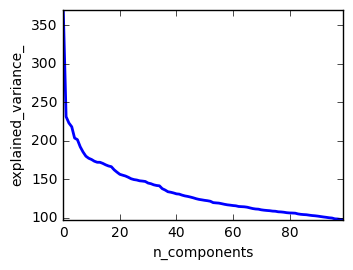

In [26]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

In [35]:
import numpy as np
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=[500, 1000,2000],
                              logistic__C=Cs))

In [ ]:
logreg.fit(X_new_train, y_train)

In [18]:
logreg.score(X_new_train, y_train)

0.11960784313725491

In [19]:
X_new_test = pca.transform(X_test)

In [20]:
logreg.score(X_new_test, y_test)

0.11937377690802348

In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
clf = MLPClassifier(activation='logistic', solver='sgd', alpha=1e-5,
...                     hidden_layer_sizes=(5, 2), random_state=1, max_iter=500)

In [57]:
clf.fit(X_train, y_train) 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [174]:
clf.predict(transformed_features[844].reshape(1,-1))

array(['yale'], dtype='<U18')

In [58]:
clf.score(X_train, y_train)

0.10326797385620914

In [65]:
len(X_train[2])

72437

In [66]:
len(labels)

2041

In [67]:
labels.unique()

AttributeError: 'list' object has no attribute 'unique'

In [69]:
lab = pd.Series(labels, name='School')
lab.describe()

count        2041
unique        112
top       harvard
freq          221
Name: School, dtype: object

# Syntactic Features - POS

In [36]:
# get part of speech for each token in each chapter
import nltk
import numpy as np
from collections import Counter
import os
from tqdm import tqdm
import time
def token_to_pos(doc):
    tokens = nltk.word_tokenize(doc)
    return [p[1] for p in nltk.pos_tag(tokens)]
directory = "C:\\NYU\\Spring18\\ML\\sample_projects\\Chen\\data\\circuit_courts\\sentences\\sentences_new\\sent_1995\\"
file = "X1AL63ON_contentMajOp_NIES.txt"
#doc_pos = [token_to_pos(doc) for doc in docs]
pos_list = ['NN', 'NNP', 'DT', 'IN', 'JJ', 'NNS']
#fvs_syntax = np.array([[doc.count(pos) for pos in pos_list] for doc in docs]).astype(np.float(64))
#fvs_syntax /= np.c_[np.array([len(doc) for doc in docs])]
cnt = Counter()
iters = os.listdir(directory)
for filename in tqdm(iters):
    indoc = open(directory + filename, 'r', encoding = 'utf-8')
    doc = indoc.read()
    doc_token = token_to_pos(doc)
    fvs_syntax = np.array([doc_token.count(pos) / len(doc_token) for pos in pos_list])
    year = '1995'
    name = filename[:]
    name = name.split('_')
    caseid = name[0]
    last_name = name[-1].lower()
    newname = year + '_' + caseid + '_' + last_name
    cnt[newname] = fvs_syntax
    indoc.close()
    

100%|██████████████████████████████████████████████████████████████████████████████| 7194/7194 [25:26<00:00,  4.71it/s]


In [37]:
len(cnt)

7184

In [42]:
import pandas as pd
data = pd.DataFrame({''})

TypeError: from_dict() got an unexpected keyword argument 'header'

In [41]:
data.head()

,1995_X1037LGN_greenberg.txt,1995_X1037M0N_after examining the briefs and record.txt,1995_X10I9ION_none..txt,1995_X11QO0ETG000N_lay.txt,1995_X1AL63ON_nies.txt,1995_X1CIRO0N_the district court granted summary judgment to defendants appellees o boyle.txt,1995_X1CIRSON_per curiam. petitioner.txt,1995_X1CIS50N_archer.txt,1995_X1CISP8N_ervin.txt,1995_X1CIT7GN_anderson.txt,...,1995_XN5BK7QNB5G0_lourie.txt,1995_XN5BLBQNB5G0_o scannlain.txt,1995_XQ5BD7_ebel.txt,1995_XQ5BD7_jenkins.txt,1995_XTMCTNQNB5G0_mayer.txt,1995_XTMCTNQNB5G0_rich.txt,1995_XTMCTRQNB5G0_fletcher.txt,1995_XTMCTRQNB5G0_rymer.txt,1995_XTMCTVQNB5G0_farris.txt,1995_XTMCTVQNB5G0_leavy.txt
0,0.136564,0.146145,0.145535,0.131079,0.127123,0.152542,0.125000,0.137525,0.146120,0.154930,...,0.164571,0.140663,0.128364,0.128223,0.173544,0.169147,0.130578,0.150327,0.185050,0.166667
1,0.077827,0.116801,0.108049,0.128799,0.100360,0.144068,0.159091,0.120498,0.116751,0.087324,...,0.105030,0.127220,0.131914,0.103868,0.071732,0.088923,0.145837,0.093208,0.066545,0.087189
2,0.124816,0.082278,0.100331,0.118541,0.073598,0.076271,0.147727,0.085134,0.073604,0.089202,...,0.091716,0.087854,0.087252,0.087393,0.113768,0.098202,0.102376,0.093492,0.103920,0.102610
3,0.111601,0.105293,0.129548,0.099924,0.109110,0.059322,0.142045,0.123772,0.112763,0.099531,...,0.100222,0.090735,0.102928,0.106017,0.110297,0.119853,0.119954,0.127877,0.117593,0.110913
4,0.024963,0.039701,0.042448,0.071429,0.090582,0.076271,0.079545,0.055010,0.047498,0.047887,...,0.041420,0.042247,0.032535,0.053725,0.053606,0.043495,0.053313,0.062234,0.039198,0.028470


In [43]:
data = data.transpose()

In [46]:
data.head()

,0,1,2,3,4,5
1995_X1037LGN_greenberg.txt,0.136564,0.077827,0.124816,0.111601,0.024963,0.032305
1995_X1037M0N_after examining the briefs and record.txt,0.146145,0.116801,0.082278,0.105293,0.039701,0.025316
1995_X10I9ION_none..txt,0.145535,0.108049,0.100331,0.129548,0.042448,0.028666
1995_X11QO0ETG000N_lay.txt,0.131079,0.128799,0.118541,0.099924,0.071429,0.052812
1995_X1AL63ON_nies.txt,0.127123,0.100360,0.073598,0.109110,0.090582,0.054555


In [45]:
data.to_csv('POS.csv')

In [17]:
import pandas as pd
data = pd.read_csv('C:\\Users\\jackie\\Documents\\POS.csv')

In [18]:
data.head()

,Unnamed: 0,0,1,2,3,4,5
0,1995_X1037LGN_greenberg.txt,0.136564,0.077827,0.124816,0.111601,0.024963,0.032305
1,1995_X1037M0N_after examining the briefs and r...,0.146145,0.116801,0.082278,0.105293,0.039701,0.025316
2,1995_X10I9ION_none..txt,0.145535,0.108049,0.100331,0.129548,0.042448,0.028666
3,1995_X11QO0ETG000N_lay.txt,0.131079,0.128799,0.118541,0.099924,0.071429,0.052812
4,1995_X1AL63ON_nies.txt,0.127123,0.100360,0.073598,0.109110,0.090582,0.054555


In [8]:
import csv
import os
mp_csv = {}
os.chdir("C:\\Users\\jackie\\Documents")
with open("chao_0811.csv", 'r') as csvfile:
    lawschool = csv.reader(csvfile, delimiter = ',')
    for rows in lawschool:
        try:
            year = rows[0]
            judge = rows[1].lower()
            school = rows[2]
            #print(year + "," + judge + "," + school)
            if year not in mp_csv:
                mp_csv[year] = []
            mp_csv[year].append((judge, school))
        except TypeError:
            print("type error")
print(len(mp_csv))

10


In [24]:
import re
from tqdm import tqdm
labels = []
features = []
for index, rows in tqdm(data.iterrows()):
    result = rows[0]
    rows = rows.drop(['Unnamed: 0'])
    result = result.replace('.', '').replace('txt', '')
    result = result.split('_')
    year = result[0]
    lastname = result[-1]
    if year in mp_csv:
        judge_school_pair = mp_csv[year]
        for i in range(len(judge_school_pair)):
            judge_name = judge_school_pair[i][0].split('_')
            if lastname == judge_name[0]:
                labels.append(judge_school_pair[i][1])
                features.append(rows)   

7184it [00:08, 864.02it/s]


In [25]:
len(labels)
len(features)

10777

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)
print(len(X_train))
print(len(X_test))

8082
2695


In [30]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)

LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
logreg.score(X_train, y_train)

0.12496906706260827

In [32]:
logreg.score(X_test, y_test)

0.12838589981447124

In [33]:
import pickle
file_name = "bigram_freq_school_v2.pickle"
f_myfile = open(file_name, 'rb')
bigram_data = pickle.load(f_myfile)
f_myfile.close()

In [40]:
year95_data = []
for i in tqdm(range(len(bigram_data))):
    if bigram_data[i][1] == '1995':
        year95_data.append(bigram_data[i])

100%|█████████████████████████████████████████████████████████████████████| 179111/179111 [00:00<00:00, 1693208.16it/s]


In [64]:
features = []
labels = []

In [65]:
for i in range(len(year95_data)):
    features.append(year95_data[i][0])
    labels.append(year95_data[i][2])

In [67]:
len(features) == len(labels)
print(len(features))

16372


In [87]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
transformed_features = vec.fit_transform(features).toarray()

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformed_features, labels, test_size=0.25)
print(len(X_train))
print(len(X_test))

12279
4093


In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)